<a href="https://colab.research.google.com/github/jfjofilipe/Aulas_2024/blob/main/Aula_2_SWAP_CNOT_and_bell_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Circuitos de Bell e Teletransporte Quantico

Vamos explorar um dos fenomenos mais fascinantes da mecanica quantica: o emaralhamento quantico. Vamos usa-lo para construir um dos algoritmos mais famosos da area: o teletransporte quantico.

Usaremos o qiskit, o framework de computacao quantica IBM, para construir e simular nossos circuitos.

O que vamos fazer:
1. Construir um estado de Bell, a forma mais simples de emaralhamento.

2. Enteder como portas quanticas complexas, como o SWAP, sao construidas.

3. Montar o protocolo completo de teletransporte.

Vamos comecar!

In [ ]:
!pip install qiskit qiskit_aer pylatexenc matplotlib  #ou apt!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=9113d214d20566ee5ae395e9e1ddfc4fe90c94b0f851f58e9806e01865c9e0c6
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=beda98dd80fd1756d3dfa3e2e1a48572b803ba36f8060929b38d04d1c429f986
  Stored in directory: /root/.cache/pip/wheels/29/20/ab/f101da7b245b996aa097685ef742243725ea6150f5b3b6d9ed
Successfully built libarchive


In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 61.5 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Simulador
from qiskit_aer import AerSimulator
#(opticonal) Melhor inline
#%matplotlib inline

import pydot
import cartopy


###O Bloco Fundamental: Emaranhamento e a Porta CNOT
Para entender o teletransporte, primeiro precisamos entender o emaranhamento. O emaranhamento é a "ação fantasmagorica à distancia" (como Einstein a chamou) que conecta fundamentalmente o sestino de dois ou mais qubits, nao importa o quão  distante estejam.

Os Estados de Bell são os exemplos mais simples e importantes de estado de dois qubits maximamente emaranhados. O circuito para criar o estado de Bell mais famoso, (|00> +|11>)/(raiz de 2)

1. Comecamos com dois qubits no estado |00>.
2. Aplicamos uma porta Hadamard (H) no qubit para coloca-lo em superposicao.
3. Aplicamos uma porta controlled-NOT (CNOT), usando o primeiro qubit como controle e o segundo como alvo.

A porta CNOT (ou CX) é a nossa principal porta de multiplos qubits. Ela "vira" (plica um NOT ou X) o quebit alvo se, e somente se, o qubit de controle for |1>. É a porta-chave para emaranhamento.

#####Atividade 1: Circuito um Estado de Bell

Na celula de codigo abaixo, vamos construir nosso primeiro muliplos quibits no Qiskit.

Sua tarefa:
  1. Crie um QuantumCircuit com 2 qubits e 2 bits classicos.
  2. Crie o estado de Bell:

*   Aplique uma Hardamad no qubit 0 (h(0)
*   Aplique uma porta CNOT onde o qubit 0 e o controle e o qubit 1 e o alvo (cx(0,1)

3. (Opcional) Adicione uma Barreira para Visualizacao.
4. Adicione medições para ambos os qubits.
5. Desenhe o circuito (print() ou .draw()).
6. Execute o circuito em um simulador e imprima os resultados (contagens)

O que esperamos ver? Se o emaranhamento foi criado corretamente, devemos medir apenas 00 ou 11, cada um com aproximadamente 50% de probabilidade.
Nunca devemos medir 01 ou 10.





     ┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1 


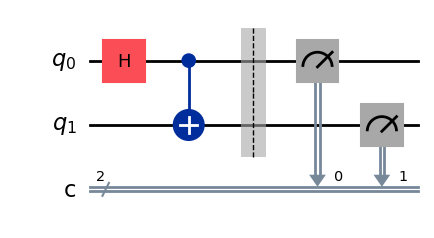

In [ ]:
#1. Crie um QuantumCircuit com 2 qubits e 2 bits clássicos.
qc_bell = QuantumCircuit(2, 2)

#2. Crie o estado de Bell:
#Aplique uma porta Hadamard no qubit 0 (.h(0))
qc_bell.h(0)  #Tod

#Aplique uma porta CNOT onde o qubit 0 é o controle e o qubit 1 é o alvo (.cx(0, 1)).
qc_bell.cx(0,1)    #Todo

#3. Adicione medicoes para ambos os qubits
qc_bell.barrier()
qc_bell.measure(qubit=[0,1],cbit=[0,1])

#4. Desenhe o circuito
print(qc_bell)
qc_bell.draw('mpl')


Resultados: {'00': 100}


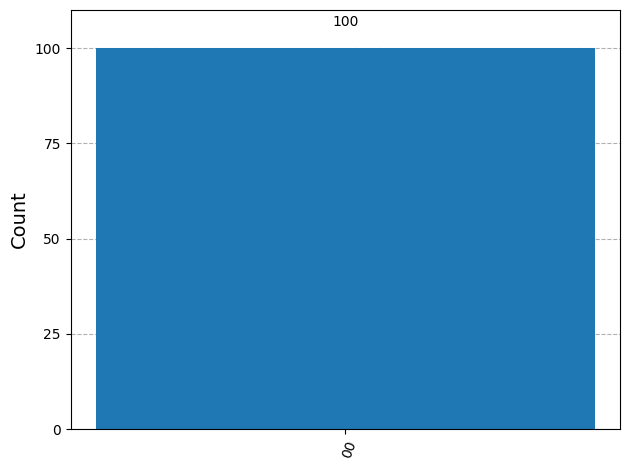

In [ ]:
#Execute o circuito em um simulador e imprima o resuldado(contagens)
#Inicializando o simulador
sim = AerSimulator()

#Aplicando o circuito para rodar no simulador
qc_bell_trans = transpile(qc_bell, sim)

#Executando o simulador 100 vezes
result = sim.run(qc_bell_trans, shots=100).result()

counts = result.get_counts()
print(f'Resultados: {counts}')

plot_histogram(counts)


Agora eu ja criei o estado \phi_+ quais modificações sao necessariasnecessárias para criar os outros estados de Bell?

###Construindo Portas: A Porta SWAP com CNOTs
Em muitos algoritimos, precisamos trocar o estado de dois qubits. A porta que faz isso é chamada de SWAP. Ela faz com que o estado do qubit \q_0 vá para o estado \q_1, e o estado de \q_1 vá para o estado \q_0.

Pode parecer uma porta fundamental, mas a porta SWAP pode, na verde , ser decomposta em portas mais simples que ja conhecemos. Uma porta SWAP é equivalente a três portas CNOT aplicadas em sequência:

SWAP(0,1) = CNOT(0,1) CNOT(1,0) CNOT(0,1)

Isso demostra um conceito importante: podemos construir operações complexas a partir de um conjunto basico de portas (como CNOT e portas de um unico quibit).

###Atividade 2: Criando uma SWAP 'Manual'.
Vamos provar que essa decomposicao funciona. Na célula abaixo, voce criará um circuito que troca o estado de dois qubits usando apenas CNOTs.

Sua tarefa:
1. Crie um QuantumCircuit com 2 qubits 2 bits classicos.
2. Inicialize os qubits em um estaddo de teste: Aplique uma porta X no qubit 0 para que o estado inicial seja |1>
3. (Opcional) Adicione uma barrier (barreira) para visualização.
4. Implemente a porta SWAP: Adicione as tres portas CNOT na sequência correta: CNOT(0,1), CNOT(1,0), CNOT(0,1).
5. (Opcional) Adicione outra barrier
6. Meca os qubits e execute no silulador

O que esperamos ver? Se comecamos com o estdo|10> (que o simulador le como 10), apos a operação de SWAP, podemos medir sempre 01.




Resultados das medicoes: {'01': 100}


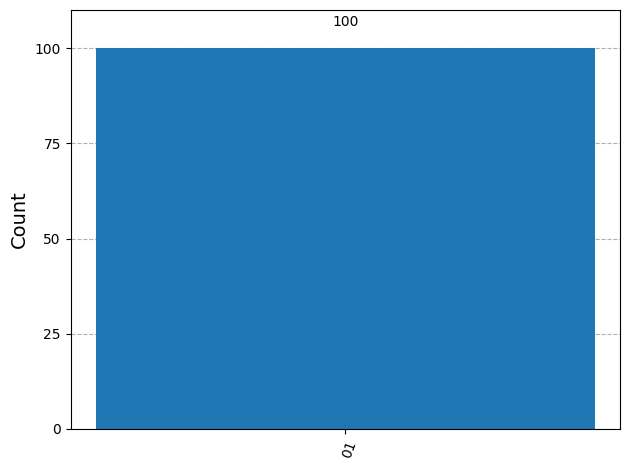

In [ ]:
#1. Crie um QuantumCircuit com 2 qubits e 2 bits classicos
qc_SWAP = QuantumCircuit(2, 2)

#2. Inicialize os qubits em um estado de teste: Aplique uma porta X no qubit 0 para que o estado inicial seja |10>
qc_SWAP.x(0)

#3. (Opcional) Adicione uma barrier (barreira) para visualização.
qc_SWAP.barrier()

#6. Meça os qubits e execute no simulador.
qc_SWAP.measure(qubit = [0, 1], cbit = [0, 1])

#Obsercando o estado inicial
sim = AerSimulator()
qc_SWAP_init = transpile(qc_SWAP, sim)
result_init = sim.run(qc_SWAP_init, shots = 100).result()
counts_init = result_init.get_counts()
print(f'Resultados das medicoes: {counts_init}')
plot_histogram(counts_init)







     ┌───┐ ░      ┌───┐      ░ ┌─┐   
q_0: ┤ X ├─░───■──┤ X ├──■───░─┤M├───
     └───┘ ░ ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ──────░─┤ X ├──■──┤ X ├─░──╫─┤M├
           ░ └───┘     └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 


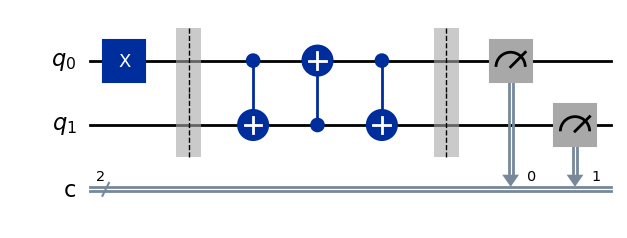

In [ ]:
#Reinicializando o circuito
qc_SWAP = QuantumCircuit(2, 2)
qc_SWAP.x(0)
qc_SWAP.barrier()

#4. Implemente a porta SWAP: Adicione as três portas CNOT na sequência correta: CNOT(0,1), CNOT(1,0), CNOT(0,1).
qc_SWAP.cx(0, 1)
qc_SWAP.cx(1, 0)
qc_SWAP.cx(0, 1)

#5. (Opcional) Adicione outra barrier.
qc_SWAP.barrier()

#6. Meça os qubits e execute no simulador.
qc_SWAP.measure(qubit = [0, 1], cbit = [0, 1])
print(qc_SWAP)
qc_SWAP.draw(output = 'mpl')


Resultados da simulacao: {'10': 1024}


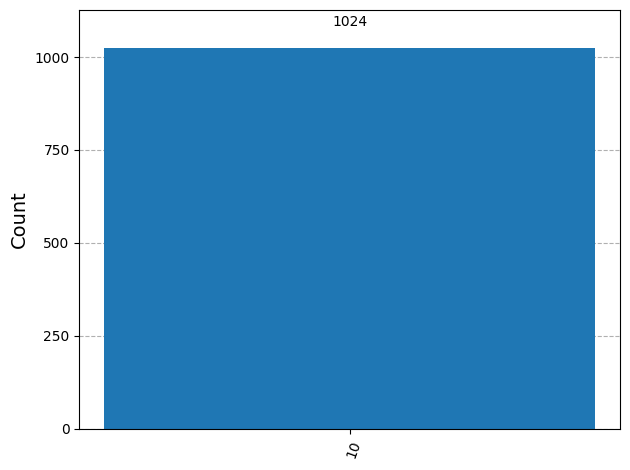

In [ ]:
#Execute o circito em um simulador e imprima os resuldados (contagens)
#Inializando o simulador
sim = AerSimulator()

#Executando o circuito para rodar no simulador
qc_SWAP_trans = transpile(qc_SWAP, sim)

#Executando o simulador 100 vezes
result = sim.run(qc_SWAP_trans, shot = 100).result()

counts = result.get_counts()
print(f'Resultados da simulacao: {counts}')
plot_histogram(counts)

###Usando a Biblioteca Qiskit: A Port SWAP Nativa
Construir portas é um optimo exercício, mas na prática, usamos as portas optimizadas e pré-construidas da biblioteca Qiskit. Isso torna nosso codigo mais limpo e legal.

####Actividade 3: Aplique a Porta .swap().
Agora, vamos repetir o experimento anterior, mas usando a porta SWAP nativa do Qiskit.

Sua Minha tarefa:
1. Crie um QuantumCircuit com 2 qubits e 2 bits clássicos.
2. Inicialize os qubits no mesmo estado de teste: Aplique uma porta X no qubit 0 (estado
).
3. (Opcional) Adicione uma barrier;
4. Implemente a porta SWAP nativa: Use o metodo .swap(0,1)
5. (Opcional) Adicione outra barrier
6. Meca os qubits e execute no simulador

Os que esperamos ver? O resultado deve ser identico ao da actividade 2. Devemos medir sempre 01, confirmando que nossa implementacao manual e a porta nativa sao equivalentes.


     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
c: 2/═════
          
Resultados da medicao: {'01': 100}


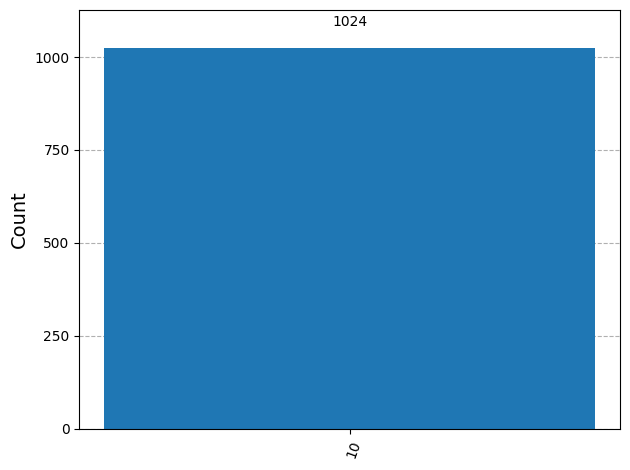

In [ ]:
#1. Crie um QuantumCircuit com 2 qubits e 2 bits clássicos.
qc_swap_nat = QuantumCircuit(2, 2)

#2. Inicialize os qubits no mesmo estado de teste: Aplique uma porta X no qubit 0 (estado |10>).
qc_swap_nat.x(0)

#3. (Opcional) Adicione uma barrier.
qc_swap_nat.barrier
qc_swap.measure(qubit = [0, 1], cbit = [0, 1])
print(qc_swap_nat)

#Observando o estado inicial
#4. Implemente a porta SWAP nativa: Use o método .swap(0, 1).
#qc_swap.swap(0, 1)

#5. (Opcional) Adicione outra barrier.
#qc_swap.barrier

#6. Meça os qubits e execute no simulador.
#Inicializacao do simulador
sim = AerSimulator()

#Aplicando o circuito para rodar no simulador
qc_swap_init = transpile(qc_swap_nat, sim)

#Executando o simulador 100 vezes
result_int = sim.run(qc_swap_init, shots = 100).result()

counts_init = result_init.get_counts()
print(f'Resultados da medicao: {counts_init}')

plot_histogram(counts)



     ┌───┐ ░     ░ ┌─┐   
q_0: ┤ X ├─░──X──░─┤M├───
     └───┘ ░  │  ░ └╥┘┌─┐
q_1: ──────░──X──░──╫─┤M├
           ░     ░  ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1 


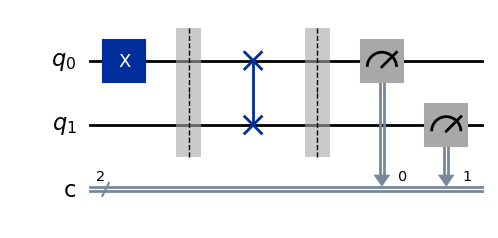

In [ ]:
#Reinicializacao do circuito
qc_swap_nat = QuantumCircuit(2, 2)
qc_swap_nat.x(0)
qc_swap_nat.barrier()

#4. Implemente a porta SWAP nativa: Use o método .swap(0, 1).
qc_swap_nat.swap(0, 1)

#5. (Opcional) Adicione outra barrier.
qc_swap_nat.barrier()

#Meça os qubits e desenhe o circuito.
qc_swap_nat.measure(qubit = [0, 1], cbit = [0, 1])
print(qc_swap_nat)
qc_swap_nat.draw(output = 'mpl')


Resultados: {'10': 100}


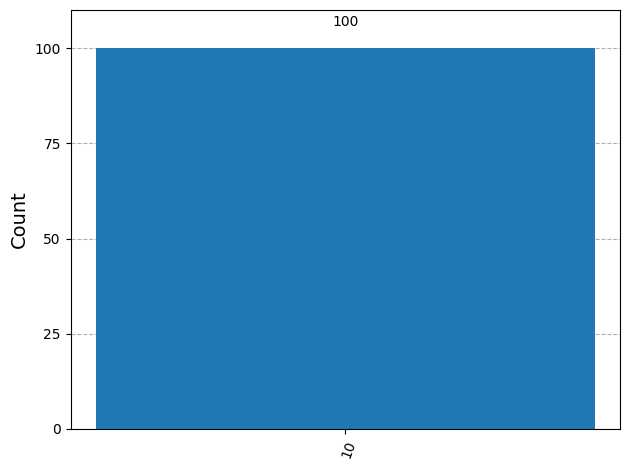

In [ ]:
#Aplicando o circuito para rodar no simulador
#inicializando o simulador
sim = AerSimulator()

#Aplicando o circuito para rodar no simulador
qc_swap_trans = transpile(qc_swap_nat, sim)

#Executando o simulador 100 vezes
result = sim.run(qc_swap_trans, shots = 100).result()

counts = result.get_counts()
print(f'Resultados: {counts}')

plot_histogram(counts)




### O Circuito de Teletransporte Quantico
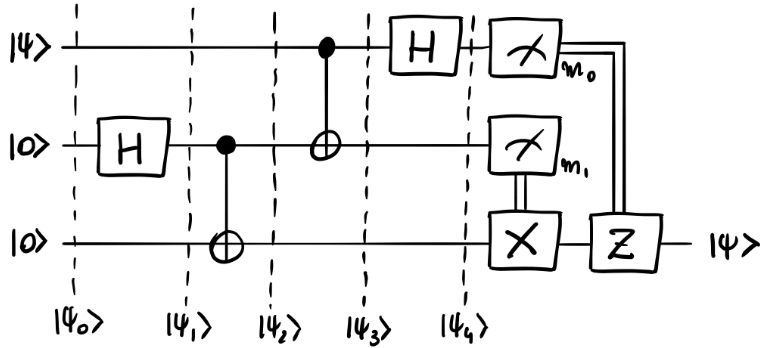
Agora é a sua vez! Implemente o circuito de teletransporte quântico utilizando o Qiskit. Lembre-se dos passos necessários:

1. Preparação do Estado (Alice): Preparamos o qubit \q_0 no estado que Alice quer enviar.
2. Criação do Emaranhamento (Alice e Bob): Criamos um estado de Bell entre \q_1
 e \q_2. Alice fica com \q_1
 e Bob com \q_2.
3. Medição de Bell (Alice): Alice "mistura" seu qubit da mensagem (\q_0) com seu qubit emaranhado (\q_1). Ela faz isso aplicando CNOT(q0, q1) e depois H(q0).
4. Comunicação Clássica (Alice -> Bob): Alice mede q0 e q1 e armazena os resultados em dois bits clássicos, c0 e c1. Ela então envia esses dois bits para Bob.
5. Correção (Bob): Bob, que está com seu qubit
q2, espera a mensagem de Alice. Baseado nos dois bits que ele recebe, ele aplica (ou não) correções em q2:
  Se c1 for 1, ele aplica uma porta X em q2.
  Se c0 for 1, ele aplica uma porta Z em q2.
No final, o qubit q2 de Bob estará exatamente no mesmo estado ψ em que q0 estava.